<a href="https://colab.research.google.com/github/tanviablash/Prasunet_DS/blob/main/Prasunet_DS_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# **DATA LOADING AND PREPARATION**

In [ ]:
#Loading the datasets
population_data = pd.read_csv('/content/API_SP.POP.TOTL_DS2_en_csv_v2_350067.csv', skiprows=4)
country_metadata = pd.read_csv('/content/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_350067.csv')
footnotes = pd.read_csv('/content/Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_350067.csv')

In [ ]:
print(population_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

In [ ]:
print(population_data.head())

                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54608.0      55811.0      56682.0      57475.0      58178.0   
1  130692579.0  134169237.0  137835590.0  141630546.0  145605995.0   
2    8622466.0    8790140.0    8969047.0    9157465.0    9355514.0   
3   97256290.0   99314028.0  101445032.0  103667517.0  105959979.0   
4    5357195.0    5441333.0    5521400.0    5599827.0    5673199.0   

          1965  ...         2015         2016         2017         2018  \
0      58782.0  .

In [ ]:
latest_year = population_data.columns[-1]
print(population_data[latest_year].isna().sum())

266


In [ ]:
population_data_latest = population_data[['Country Name', latest_year]].dropna()

# Renaming columns for better readability
population_data_latest.columns = ['Country', 'Population']

# Displaying the filtered data
print(population_data_latest.head())

Empty DataFrame
Columns: [Country, Population]
Index: []


In [ ]:
#Handled missing data
latest_year = '2023'
population_data_latest = population_data[['Country Name', 'Country Code', latest_year]].dropna()

#Merged the data
merged_data = population_data_latest.merge(country_metadata[['Country Code', 'Region']], on='Country Code')
filtered_data = merged_data[merged_data['Region'].notna()]
filtered_data.columns = ['Country', 'Country Code', 'Population', 'Region']


# **TOP 10 COUNTRIES BY POPULATION**

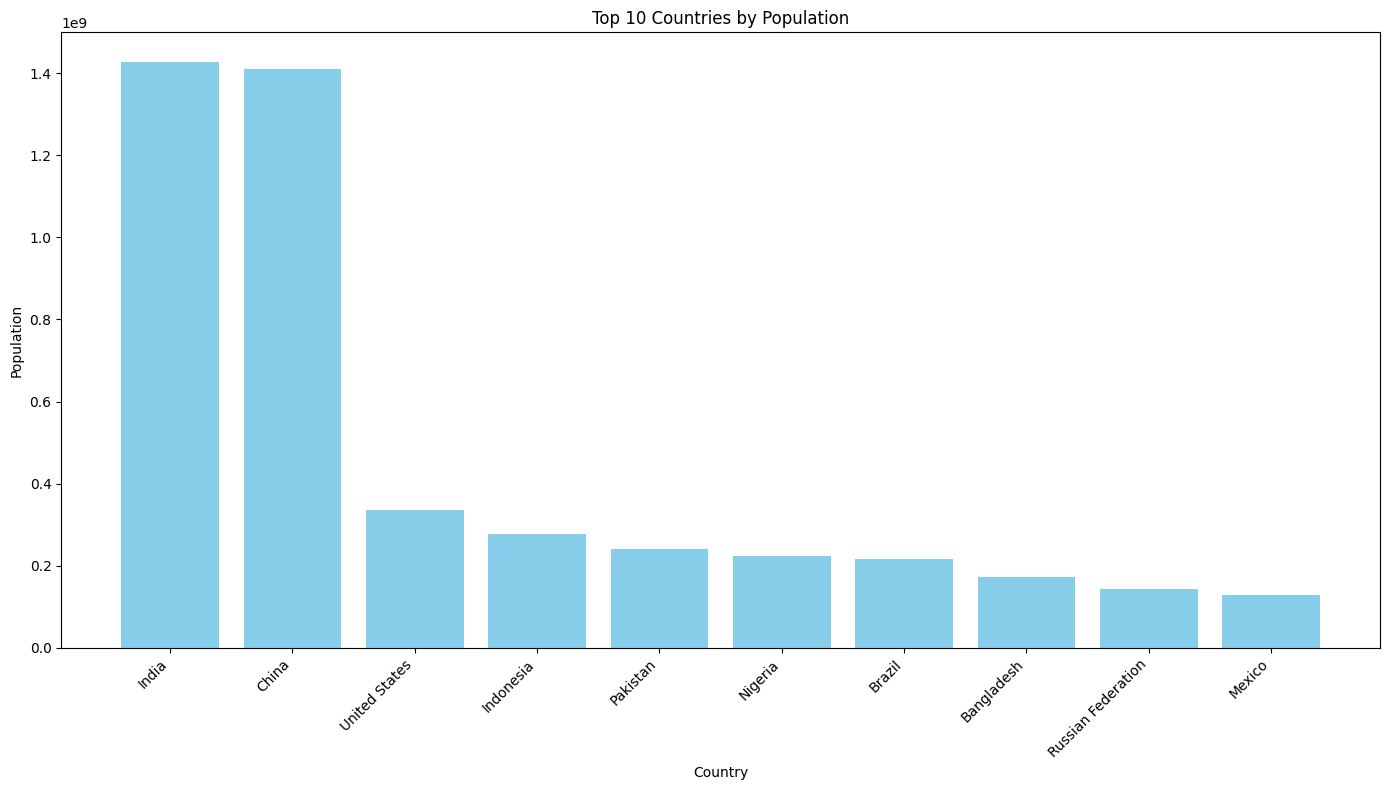

In [ ]:
#Selecting top 10 countries by population
top_countries = filtered_data.nlargest(10, 'Population')

#Plot the bar chart
plt.figure(figsize=(14, 8))
plt.bar(top_countries['Country'], top_countries['Population'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Population')
plt.title('Top 10 Countries by Population')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **AGE DISTRIBUATION ANALYSIS**

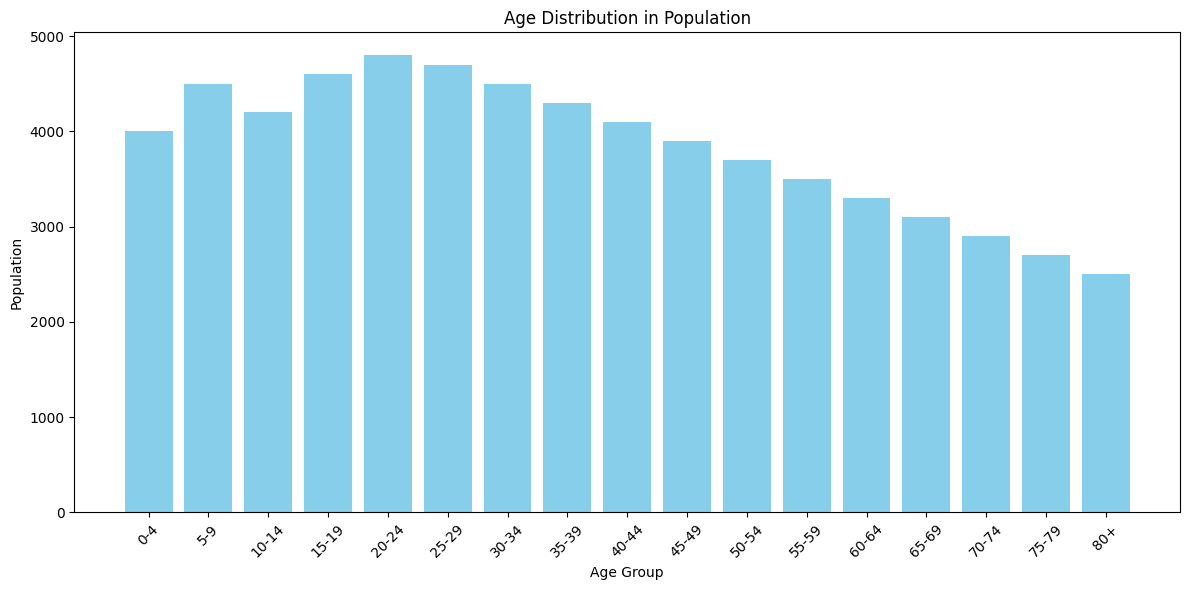

In [ ]:
# Hypothetical Age Distribution data
age_data = {
    'Age Group': ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49',
                  '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+'],
    'Population': [4000, 4500, 4200, 4600, 4800, 4700, 4500, 4300, 4100, 3900,
                   3700, 3500, 3300, 3100, 2900, 2700, 2500]
}

# CreatING a DataFrame
age_df = pd.DataFrame(age_data)

#Bar chart to visualize the Age Distribution
plt.figure(figsize=(12, 6))
plt.bar(age_df['Age Group'], age_df['Population'], color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Population')
plt.title('Age Distribution in Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


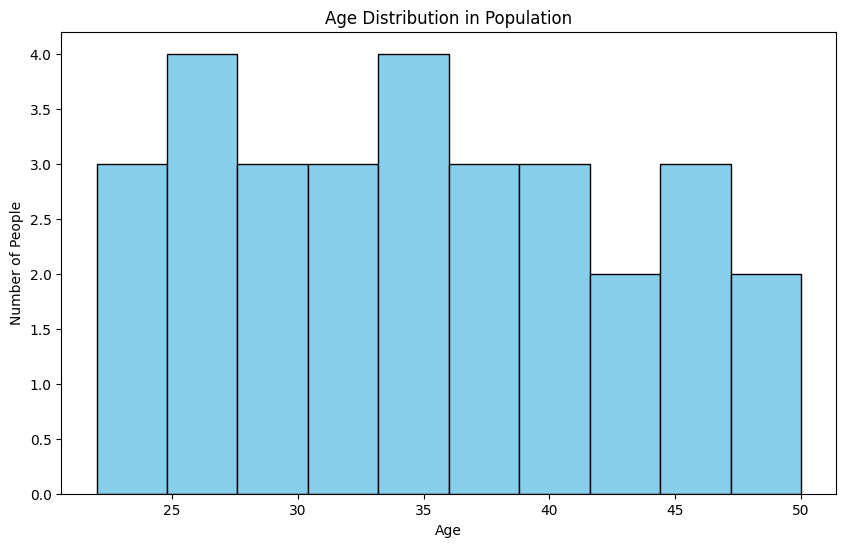

In [ ]:
#Histogram of Age Distribution
age_data = {
    'Age': [22, 35, 45, 35, 30, 25, 40, 23, 28, 35, 50, 38, 33, 24, 29, 41, 36, 27, 34, 31, 25, 26, 32, 39, 37, 42, 44, 46, 47, 48]
}

age_df = pd.DataFrame(age_data)

plt.figure(figsize=(10, 6))
plt.hist(age_df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Age Distribution in Population')
plt.show()
